# Basic Statistics in Python

## Statistical Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
market = '^GSPC'
start = '2014-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
dfm = yf.download(market,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
df.shape

(1258, 6)

In [4]:
new_df = pd.DataFrame({symbol : df['Adj Close'], market : dfm['Adj Close']}, index=df.index)

# compute returns
new_df[['stock_returns','market_returns']] = new_df[[symbol,market]] / new_df[[symbol,market]].shift(1) -1
new_df = new_df.dropna()
covmat = np.cov(new_df["stock_returns"],new_df["market_returns"])

# calculate measures now
beta = covmat[0,1]/covmat[1,1]
alpha= np.mean(new_df["stock_returns"])-beta*np.mean(new_df["market_returns"])

In [5]:
print('Beta:', beta)
print('Alpha:', alpha)

Beta: 1.61279488
Alpha: 0.0015127435601


In [6]:
close = df['Adj Close']

## Mean is the average

In [7]:
mean = np.mean(close)
mean

8.164427659777418

## Median is the value of middlemost value

In [8]:
median = np.median(close)
median

5.0999999999999996

## Mode is the most frequent value

In [9]:
mode = stats.mode(close)
print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 2.28 with a count of 12


## Range is a measure of how spread apart the values are

In [10]:
range_of_stock = np.ptp(close)
range_of_stock

31.100001000000002

## Variance is a measure of how variable the data is

In [11]:
variance = np.var(close)
variance

41.891972836178724

## Standard deviation is the square root of the variance and is measure how the data is spread out

In [12]:
standard_deviation = np.std(close)
standard_deviation

6.4724008556469

## Standard error is the mean (SE of the mean) estimates the variability between sample means that you would obtain if you took multiple samples from the same population

In [13]:
standard_error = stats.sem(close)
standard_error

0.18255669629927632

## Z-Scores measure how many standard deviations an element is from the mean

In [14]:
z = np.abs(stats.zscore(close))
print(z)

[ 0.65113823  0.64341312  0.62332784 ...,  1.4408212   1.49180691
  1.59068815]


##  Contingency Table shows correlations between two variables

In [15]:
data_crosstab = pd.crosstab(df['High'], 
                            df['Low'],  
                               margins = False) 
print(data_crosstab) 

Low        1.610000   1.620000   1.650000   1.660000   1.680000   1.690000   \
High                                                                          
1.690000           0          0          1          0          0          0   
1.700000           1          0          0          1          0          0   
1.720000           0          0          0          0          1          0   
1.730000           0          0          0          2          0          0   
1.750000           0          0          0          0          1          0   
1.770000           0          1          1          0          0          0   
1.780000           0          0          0          0          0          1   
1.800000           0          0          0          0          1          0   
1.810000           0          0          0          0          0          0   
1.820000           0          0          0          1          0          0   
1.830000           0          0          1          

## Scatter plot shows two variables that plot along two axes and it shows correlation or not

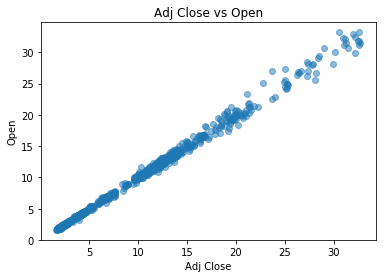

In [16]:
plt.scatter(df['Adj Close'], df['Open'], alpha=0.5)
plt.title('Adj Close vs Open')
plt.xlabel('Adj Close')
plt.ylabel('Open')
plt.show()

## Regression is a measure of the relation between the mean value of one variable (e.g. output) and corresponding values of other variables

In [17]:
from sklearn.linear_model import LinearRegression

X = np.array(df['Open']).reshape(1258,-1)
y = np.array(df['Adj Close'])
LR = LinearRegression().fit(X, y)
LR.score(X, y)

0.9967102090185268

In [18]:
LR.coef_

array([ 0.99734456])

In [19]:
LR.intercept_

0.019967673234484451

In [20]:
LR.predict(X)

array([  3.85974423,   3.98939903,   4.01931936, ...,  17.40368338,
        17.50341883,  18.12177146])

## Elementary Probability Theory the outcome that could happen

### Monte Carlo method is an experimentals of computational algorithms that rely on repeated random samples. 

In [21]:
df['Returns'] = df['Adj Close'].pct_change()
df['Returns'] = df['Returns'].dropna()

In [22]:
df = df.dropna()

In [23]:
values = []
S = df['Returns'][-1] #Starting stock price 
T = 252 #Number of trading days
mu = df['Returns'].mean() #Mean
sigma = df['Returns'].std()*math.sqrt(252) #Volatility

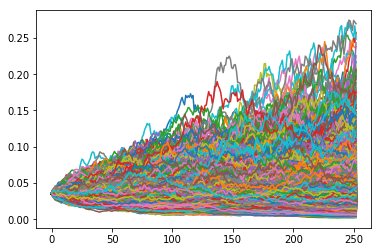

In [24]:
for i in range(10000):
    # Create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,sigma/math.sqrt(T),T)+1
    
    # Set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    # Plot the data
    plt.plot(price_list)
plt.show()

## Random variables and probability distributions

https://www.investopedia.com/articles/06/probabilitydistribution.asp

### Cumulative Distribution 

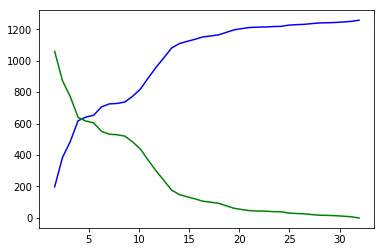

In [25]:
data = df['Adj Close']
values, base = np.histogram(data, bins=40)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
plt.plot(base[:-1], cumulative, c='blue')
#plot the survival function
plt.plot(base[:-1], len(data)-cumulative, c='green')

plt.show()

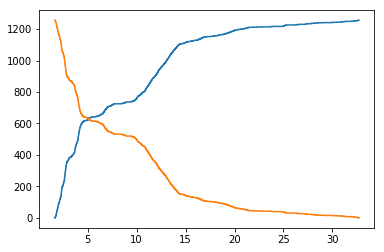

In [26]:
sorted_data = np.sort(data)  # Or data.sort(), if data can be modified

# Cumulative counts:
plt.step(sorted_data, np.arange(sorted_data.size))  # From 0 to the number of data points-1
plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0

plt.show()

### Probability Density Function

Probability Density Function (PDF) is continuous random variable and have value that is given sample in the sample space can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample. (Wikipedia)

Text(0.5,1,'Probability Density Function')

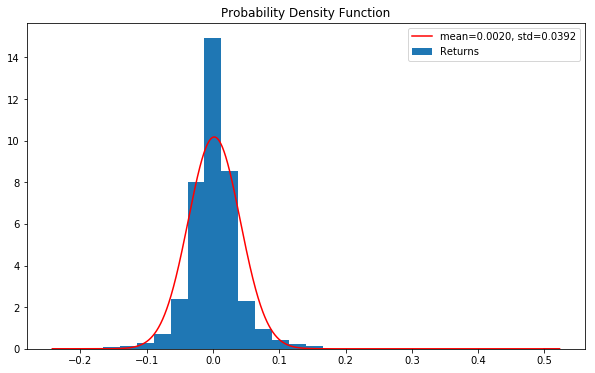

In [27]:
values = df['Returns'][1:]
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')
ax.set_title("Probability Density Function")

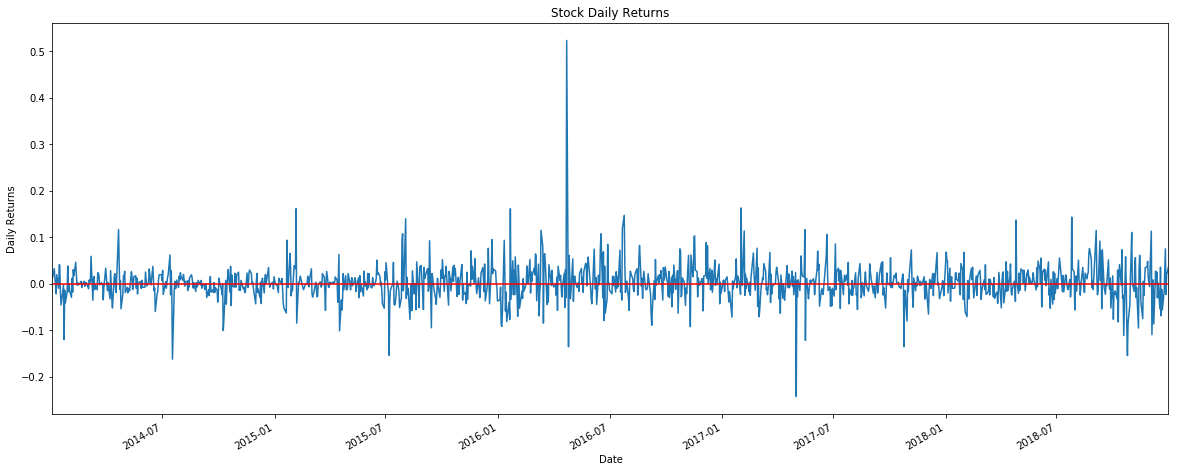

In [28]:
# Log return goes up and down during the period
df['Returns'].plot(figsize=(20, 8))
plt.title("Stock Daily Returns")
plt.axhline(0, color='red')
plt.ylabel('Daily Returns')
plt.show()

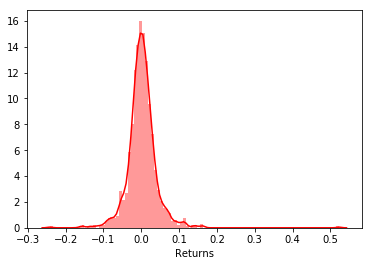

In [29]:
sns.distplot(df['Returns'].dropna(),bins=100,color='red')

## Cumulative Probability Distribution

Text(0.5,1,'Cumulative Probability Distribution')

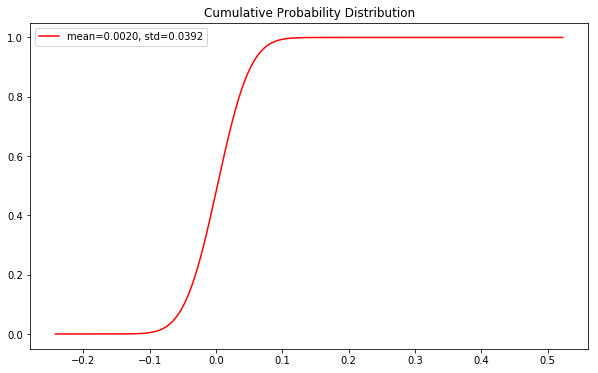

In [30]:
values = df['Returns'][1:]
x = np.linspace(values.min(), values.max(), len(values))
loc, scale = stats.norm.fit(values)
param_density = stats.norm.cdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
#ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')
ax.set_title("Cumulative Probability Distribution")

## Binomial Distribution

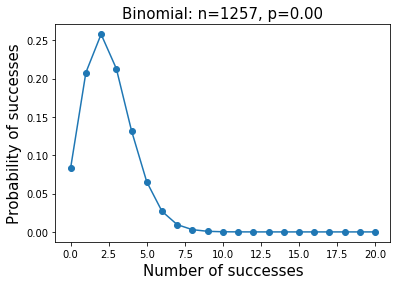

In [31]:
from scipy.stats import binom

n = len(df['Returns'])
p = df['Returns'].mean()
k = np.arange(0,21)
binomial = binom.pmf(k,n,p)

plt.plot(k, binomial, 'o-')
plt.title("Binomial: n=%i, p=%.2f" % (n,p), fontsize=15)
plt.xlabel("Number of successes", fontsize=15)
plt.ylabel("Probability of successes", fontsize=15)
plt.show()

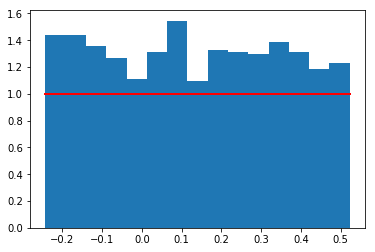

In [32]:
s = np.random.uniform(values.min(), values.max(), len(values))

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

Mean: 2.484000
SD: 1.556980


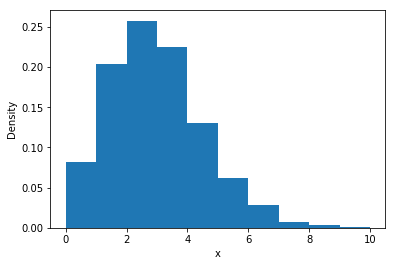

In [33]:
binom_sim = binom.rvs(n = n, p = p, size=10000)
print("Mean: %f" % np.mean(binom_sim))
print("SD: %f" % np.std(binom_sim, ddof=1))
plt.hist(binom_sim, bins = 10, normed = True)
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

## Poisson Distribution

In [34]:
rate = 3 # Error Rate
n = np.arange(0,10) # Number of Trials
y = stats.poisson.pmf(n, rate)
y

array([ 0.04978707,  0.14936121,  0.22404181,  0.22404181,  0.16803136,
        0.10081881,  0.05040941,  0.02160403,  0.00810151,  0.0027005 ])

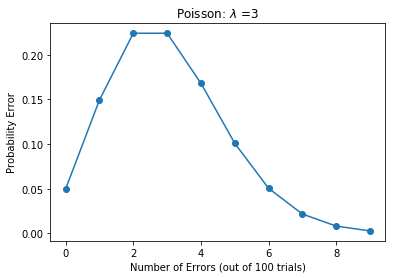

In [35]:
plt.plot(n, y, 'o-')
plt.title('Poisson: $\lambda$ =%i' % rate)
plt.ylabel('Probability Error')
plt.xlabel('Number of Errors (out of 100 trials)')
plt.show()

Mean: 3.000000
Standard Deviation: 1.758098


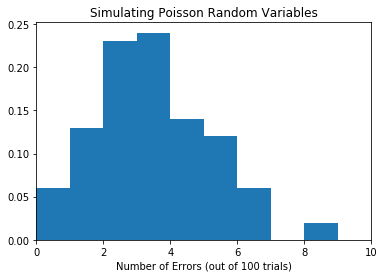

In [36]:
data = stats.poisson.rvs(mu=3, loc=0, size=100)
print("Mean: %f" % np.mean(data))
print("Standard Deviation: %f" % np.std(data, ddof=1))

plt.hist(data, bins = 9, normed = True)
plt.xlim(0,10)
plt.xlabel('Number of Errors (out of 100 trials)')
plt.title('Simulating Poisson Random Variables')
plt.show()

## Beta Distribution

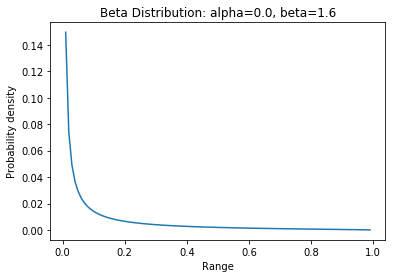

In [37]:
alpha = alpha
beta = beta
x = np.arange(0, 1, 0.01)
y = stats.beta.pdf(x, alpha, beta)
plt.plot(x, y)
plt.title('Beta Distribution: alpha=%.1f, beta=%.1f' % (alpha,beta))
plt.xlabel('Range')
plt.ylabel('Probability density')
plt.show()

## Exponential Distribution

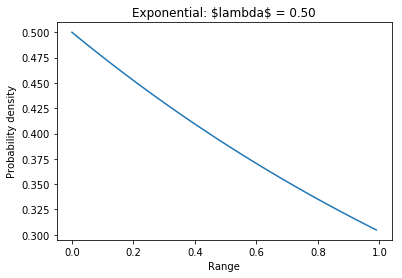

In [38]:
lambd = 0.5 # lambda
x = np.arange(0, 1, 0.01)
y = lambd * np.exp(-lambd * x)
plt.plot(x, y)
plt.title('Exponential: $lambda\$ = %.2f' % lambd)
plt.xlabel("Range")
plt.ylabel("Probability density")
plt.show()

## Lognormal Distribution 

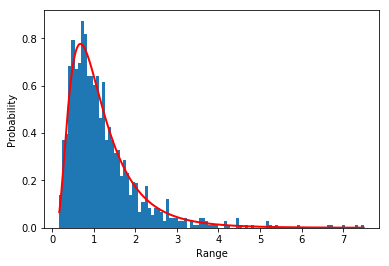

In [39]:
from scipy.stats import lognorm

s = np.random.lognormal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')
plt.xlabel('Range')
plt.ylabel('Probability')
plt.axis('tight')
plt.show()

## Calculate Quantile

In [40]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -1.02188692209
95% quantile  1.02582945005


In [41]:
# Calcuate the 25% and 75% Quantile of the stock's returns
# 25% quantile
q25 = norm.ppf(0.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(0.75, mu, sigma) 
print('75% quantile ', q75)

25% quantile  -0.417872691034
75% quantile  0.421815218993


## Statistical Hypothesis Tests

Hypothesis test is a statistical method that is used to make statistical decisions for experimental data. In addition, is used for to compare two dataset. 

Statistical tests is used to check if the data has a Gaussian distribution or not

Alpha or α: is the probability of rejecting the null hypothesis when it is true.

P-values: the probability of obtaining an effect at least as extreme as the one in the sample data while assuming the truth of the null hypothesis.

p-value <= alpha: reject H0, not normal.

p-value > alpha: fail to reject H0, normal.

## Calculate test Statistics

In [42]:
# https://www.statisticshowto.datasciencecentral.com/standardized-test-statistic/
mu = df['Returns'].mean()
sigma = df['Returns'].std(ddof=1)
n = df['Returns'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (mu - 0)/(sigma/n**0.5)
print(zhat)

1.782379363617273


## Set decision criteria

In [43]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.95996398454 1.95996398454


## Decision to reject H0 or not

In [44]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: False


## One Tail Test

In [45]:
# Test one tail
mu = df['Returns'].mean()
sigma = df['Returns'].std(ddof=1)
n = df['Returns'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (mu - 0)/(sigma/n**0.5)
print(zhat)

1.782379363617273


In [46]:
alpha = 0.05

zright = norm.ppf(1-alpha, 0, 1)
print(zright)

1.64485362695


In [47]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: True


## Test for p-value

In [48]:
p_value = 1 - norm.cdf(zhat, 0, 1)
print(p_value)

0.0373436942162


In [49]:
print('At significant level of {}, shall we reject: {}'.format(alpha, p_value < alpha))

At significant level of 0.05, shall we reject: True


The stock data is continuous data. Here the list of doing hypothesis test.

For this part, is about comparing features and targets or two samples. Some of the hypothesis testing, we can test one samples.

List of continuous: https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html

## Shapiro-Wilk Test

In [50]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
import scipy as sp


W_test, p_value = shapiro(df['Returns'])

In [51]:
# confidence level is 95%, that is, alpha=0.05
print('Shapiro-Wilk Test')
print('-'*40)

alpha = 0.05
if p_value < alpha:  # null hypothesis: x comes from a normal distribution
    print("H0: the sample has a Gaussian distribution.")
    print("The null hypothesis can be rejected")
else:
    print("H1: the sample does not have a Gaussian distribution.")
    print("The null hypothesis cannot be rejected")

Shapiro-Wilk Test
----------------------------------------
H0: the sample has a Gaussian distribution.
The null hypothesis can be rejected


## D’Agostino’s K^2 Test

In [52]:
# Anderson_Darling Test
from scipy.stats import anderson

result = anderson(df['Returns'].dropna())
result

AndersonResult(statistic=24.987609879932279, critical_values=array([ 0.574,  0.654,  0.785,  0.915,  1.089]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [53]:
print('D’Agostino’s K^2 Test')
print('-'*40)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

D’Agostino’s K^2 Test
----------------------------------------
Statistic: 24.988
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


The correlation is used to test out the samples or features is correlation or not.

Therefore, to check two samples or features are related or not.

## F-test

In [54]:
import scipy
from scipy.stats import f

F = df['Adj Close'].var() / df['Returns'].var()
df1 = len(df['Adj Close']) - 1 
df2 = len(df['Returns']) - 1 
p_value = scipy.stats.f.cdf(F, df1, df2)

In [55]:
print('F-test')
print('-'*40)
print('Statistic: %.3f' % p_value)
# interpret the significance
alpha = 0.05
if p_value > alpha:
	print('H0: the two samples are independent. p=%.3f' % p_value)
else:
	print('H1: there is a dependency between the samples. p=%.3f' % p_value)

F-test
----------------------------------------
Statistic: 1.000
H0: the two samples are independent. p=1.000


## Pearson’s Correlation Coefficient

In [56]:
from scipy.stats import pearsonr

coef, p_value = pearsonr(df['Open'], df['Adj Close'])

In [57]:
print('Pearson’s Correlation Coefficient')
print('-'*40)
print('Correlation Test: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p_value > alpha:
	print('H0: the two samples are independent. p=%.3f' % p_value)
else:
	print('H1: there is a dependency between the samples. p=%.3f' % p_value)

Pearson’s Correlation Coefficient
----------------------------------------
Correlation Test: 0.998
H1: there is a dependency between the samples. p=0.000


## Spearman's Rank Correlation

In [58]:
# Spearman's Rank Correlation
from scipy.stats import spearmanr

coef, p_value = spearmanr(df['Open'], df['Adj Close'])

In [59]:
print('Spearman’s Rank Correlation')
print('-'*40)
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p_value > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_value)

Spearman’s Rank Correlation
----------------------------------------
Spearmans correlation coefficient: 0.998
Samples are correlated (reject H0) p=0.000


## Kendall's Rank Correlation

In [60]:
# Kendall's Rank Correlation
from scipy.stats import kendalltau

coef, p_value = kendalltau(df['Open'], df['Adj Close'])

In [61]:
print('Kendall’s Rank Correlation')
print('-'*40)
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p_value)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p_value)

Kendall’s Rank Correlation
----------------------------------------
Kendall correlation coefficient: 0.967
Samples are correlated (reject H0) p=0.000


## Chi-Squared Test

In [62]:
# Chi-Squared Test
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p_value, dof, expected = chi2_contingency(df[['Open','Low','High','Adj Close','Volume']])

In [63]:
# interpret test-statistic
print('Chi-Squared Test')
print('-'*40)

prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Chi-Squared Test
----------------------------------------
Dependent (reject H0)


In [64]:
# interpret p-value
alpha = 1.0 - prob
if p_value <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Dependent (reject H0)


In [65]:
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p_value))
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

dof=5024
[[  4.29482020e+00   4.19128857e+00   4.39401482e+00   4.29387501e+00
    2.28871987e+07]
 [  7.95610731e+00   7.76431610e+00   8.13986425e+00   7.95435634e+00
    4.23982845e+07]
 [  8.05627575e+00   7.86206987e+00   8.24234622e+00   8.05450274e+00
    4.29320845e+07]
 ..., 
 [  2.08993226e+01   2.03955201e+01   2.13820204e+01   2.08947231e+01
    1.11372986e+08]
 [  2.04942584e+01   2.00002205e+01   2.09676007e+01   2.04897480e+01
    1.09214389e+08]
 [  1.59001374e+01   1.55168462e+01   1.62673724e+01   1.58966382e+01
    8.47322094e+07]]
probability=0.950, critical=5190.009, stat=14246523.362
Dependent (reject H0)
significance=0.050, p=0.000
Dependent (reject H0)


This part is to compare two samples or features; as a results, to check if they both independent samples.

## Parametric Statistical Hypothesis Tests

T-test for the means of two independent samples of scores Two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values

In [66]:
# Parametric Statistical Hypothesis Tests
# Student’s t-test
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(df['Open'], df['Adj Close'])

In [67]:
print('Paired Students t-Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Paired Students t-Test
----------------------------------------
Statistics=0.007, p=0.994
Same distributions (fail to reject H0)


## Paired Student’s t-test

In [68]:
# Paired Student’s t-test
from scipy.stats import ttest_rel

stat, p_value = ttest_rel(df['Open'], df['Adj Close'])

In [69]:
print('Paired Students t-Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Paired Students t-Test
----------------------------------------
Statistics=0.171, p=0.000
Same distributions (fail to reject H0)


## Analysis of Variance Test (ANOVA)

In [70]:
# Analysis of Variance Test (ANOVA)
from scipy.stats import f_oneway

stat, p_value = f_oneway(df['Open'], df['Adj Close'], df['Volume'])

In [71]:
print('Analysis of Variance Test (ANOVA)')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Analysis of Variance Test (ANOVA)
----------------------------------------
Statistics=1424.935, p=0.000
Different distributions (reject H0)


## Mann-Whitney U Test

In [72]:
# Nonparametric Statistical Hypothesis Tests
# Mann-Whitney U Test
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(df['Open'], df['Adj Close'])

In [73]:
print('Mann-Whitney U Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Mann-Whitney U Test
----------------------------------------
Statistics=789756.500, p=0.494
Same distribution (fail to reject H0)


## Wilcoxon Signed-Rank Test

In [74]:
# Wilcoxon Signed-Rank Test
from scipy.stats import wilcoxon

stat, p_value = wilcoxon(df['Open'], df['Adj Close'])

In [75]:
print('Wilcoxon Signed-Rank Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Wilcoxon Signed-Rank Test
----------------------------------------
Statistics=364609.000, p=0.849
Same distribution (fail to reject H0)


## Kruskal-Wallis Test

In [76]:
# Kruskal-Wallis Test
from scipy.stats import kruskal

stat, p_value = kruskal(df['Open'], df['Adj Close'], df['Volume'])

In [77]:
print('Kruskal-Wallis Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Kruskal-Wallis Test
----------------------------------------
Statistics=2505.346, p=0.000
Different distributions (reject H0)


## Friedman Test

In [78]:
from scipy.stats import friedmanchisquare

stat, p_value = friedmanchisquare(df['Open'], df['Adj Close'], df['Volume'])

In [79]:
print('Friedman Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Friedman Test
----------------------------------------
Statistics=1897.004, p=0.000
Different distributions (reject H0)


## Levene Test

In [80]:
# Levene Test
from scipy.stats import levene

stat, p_value = levene(df['Open'], df['Adj Close'])

In [81]:
print('Levene Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Levene Test
----------------------------------------
Statistics=0.000, p=0.983
Same distributions (fail to reject H0)


## Mood's Test

In [82]:
from scipy.stats import mood

stat, p_value = mood(df['Open'], df['Adj Close'])

In [83]:
print('Mood Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mood Test
----------------------------------------
Statistics=0.005, p=0.996
Same distributions (fail to reject H0)


## Mood’s median test

In [84]:
from scipy.stats import median_test

stat, p_value, med, tbl = median_test(df['Open'], df['Adj Close'], df['Volume'])

In [85]:
print('Mood’s median test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mood’s median test
----------------------------------------
Statistics=1880.581, p=0.000
Different distributions (reject H0)


In [86]:
stat, p_value, med, tbl = median_test(df['Open'], df['Adj Close'], df['Volume'],lambda_="log-likelihood")

In [87]:
print('Mood’s median test with lambda')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Mood’s median test with lambda
----------------------------------------
Statistics=2383.028, p=0.000
Different distributions (reject H0)


## Kolmogorov-Smirnov Test

In [88]:
# Kolmogorov-Smirnov test
from scipy.stats import ks_2samp

stat, p_value = ks_2samp(df['Open'], df['Adj Close'])

In [89]:
print('Kolmogorov-Smirnov Test')
print('-'*40)
print('Statistics=%.3f, p=%.3f' % (stat, p_value))
# interpret
alpha = 0.05
if p_value > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Kolmogorov-Smirnov Test
----------------------------------------
Statistics=0.006, p=1.000
Same distributions (fail to reject H0)


## Box-Cox Power Transformation

In [90]:
from scipy.stats import boxcox

df['boxcox'], lam = boxcox(df['Adj Close'])

In [91]:
print('Lambda: %f' % lam)

Lambda: -0.119624


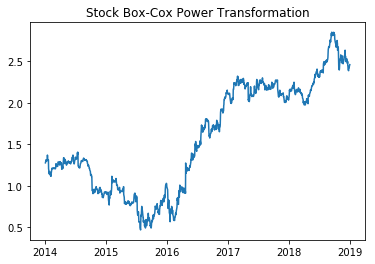

In [92]:
# Plot line
plt.title('Stock Box-Cox Power Transformation')
plt.plot(df['boxcox'])
plt.show()

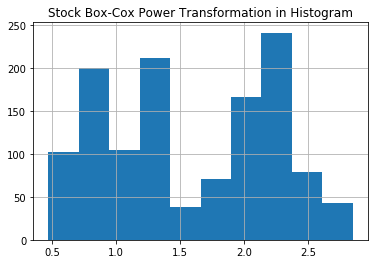

In [93]:
# Plot histogram
plt.title('Stock Box-Cox Power Transformation in Histogram')
plt.hist(df['boxcox'])
plt.grid()
plt.show()